In [ ]:
# Import required packages
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_location = "..\data"
train_data_location_name = f"{file_location}\Training.csv"
test_data_location_name = f"{file_location}\Testing.csv"


In [4]:
# Load the data 
# We're loading both training and testing data to see what we have to work with

# Load Train Data
train_data = pd.read_csv(train_data_location_name)
print(train_data.shape)
# Load Test Data
test_data = pd.read_csv(test_data_location_name)
print(test_data.shape)

(4920, 134)
(42, 133)


In [5]:
# Lets visually explore the train data

train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [6]:
# Lets visually explore the test data

test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [7]:
# Data Cleaning: The train data has an extra column and must be removed

# Schema Change
train_data.drop('Unnamed: 133', axis=1, inplace=True) 
train_data["prognosis"].str.strip()

# Lets preview the test data to confirm the column has been removed
train_data.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [8]:
# Upon inspection it looks like test_data only has one observation per prognosis. Hence, it is not useful for ML purposes. 

# Decision: We have made the decision to combine the test and train and later use train_test_split from scikit_learn

union_df_reset_index = pd.concat([train_data, test_data], ignore_index=True)

In [9]:
# Remove the trailing whitespaces
union_df_reset_index["prognosis"] = union_df_reset_index["prognosis"].str.strip()

# Filter for the specific data
# filtered = union_df_reset_index[union_df_reset_index['prognosis'].isin(['Heart attack', 'Tuberculosis', 'Pneumonia','GERD'])].copy()

filtered = union_df_reset_index.copy()

# Check out the shape of the dataframe
print(f"Train data shape{filtered.shape}")


Train data shape(4962, 133)


In [10]:
# Import required scikit_learn packages

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV


In [11]:
# Define symptom columns (all columns except 'prognosis')
symptom_columns = [col for col in filtered.columns if col != 'prognosis']
print(f"\nNumber of symptom columns: {len(symptom_columns)}")


Number of symptom columns: 132


In [12]:
# Lets define and X and y for the models.

X = filtered[symptom_columns] # Features
y = filtered['prognosis'] # Labels
print(y)

0              Fungal infection
1              Fungal infection
2              Fungal infection
3              Fungal infection
4              Fungal infection
                 ...           
4957                       Acne
4958    Urinary tract infection
4959                  Psoriasis
4960                   Impetigo
4961           Fungal infection
Name: prognosis, Length: 4962, dtype: object


In [13]:
# We need to encode the categorical variables

label_encoder= LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [14]:
# Here we will split the data in train and test. 
# stratify=y_encoded in the function parameter ensures class proportions are maintained in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Lets confirm the train and test split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nPrognosis distribution in training set:")
train_prognosis_counts = pd.Series(y_train).map(lambda x: label_encoder.inverse_transform([x])[0]).value_counts(normalize=True)
print(train_prognosis_counts)

print("\nPrognosis distribution in test set:")
test_prognosis_counts = pd.Series(y_test).map(lambda x: label_encoder.inverse_transform([x])[0]).value_counts(normalize=True)
print(test_prognosis_counts)


Shape of X_train: (3969, 132)
Shape of X_test: (993, 132)
Shape of y_train: (3969,)
Shape of y_test: (993,)

Prognosis distribution in training set:
Bronchial Asthma                           0.024439
Hepatitis C                                0.024439
Hypothyroidism                             0.024439
Pneumonia                                  0.024439
(vertigo) Paroymsal  Positional Vertigo    0.024439
Chicken pox                                0.024439
Diabetes                                   0.024439
Hyperthyroidism                            0.024439
Gastroenteritis                            0.024439
Allergy                                    0.024439
GERD                                       0.024439
Migraine                                   0.024439
AIDS                                       0.024439
Hypoglycemia                               0.024439
Typhoid                                    0.024439
Hepatitis E                                0.024439
Psoriasis          

In [15]:
all_zero_cols_in_train_fold = X_train.columns[(X_train == 0).all()].tolist()

In [16]:
if all_zero_cols_in_train_fold:
# Remove these columns from both X_train_processed_fold and X_test_processed_fold
    X_train_final_fold = X_train.drop(columns=all_zero_cols_in_train_fold)
    X_test_final_fold = X_test.drop(columns=all_zero_cols_in_train_fold)
else:
    X_train_final_fold = X_train
    X_test_final_fold = X_test

In [17]:
# Initialize the Random Forest Classifier
# n_estimators: Number of trees in the forest. A higher number generally improves performance.
# random_state: For reproducibility.
# class_weight='balanced': Addresses potential class imbalance by giving more weight to minority classes.
rf_model = RandomForestClassifier(
    n_estimators=200,      # A common starting point, can be tuned
    random_state=42,
    class_weight='balanced',
    max_features='sqrt',   # Number of features to consider when looking for the best split
    min_samples_leaf=5     # Minimum number of samples required to be at a leaf node
)

print("Training Random Forest Classifier...")
rf_model.fit(X_train, y_train)
print("Random Forest Classifier training complete!")
rf_model

Training Random Forest Classifier...
Random Forest Classifier training complete!


RandomForestClassifier(class_weight='balanced', min_samples_leaf=5,
                       n_estimators=200, random_state=42)

In [18]:
# Define the cross-validation strategy
# StratifiedKFold ensures each fold has the same proportion of classes as the full dataset.
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [19]:
# Define scoring metrics for multi-class classification
scoring = {
    'accuracy': 'accuracy',
    'precision_weighted': 'precision_weighted',
    'recall_weighted': 'recall_weighted',
    'f1_weighted': 'f1_weighted'
}

In [20]:
# Perform cross-validation
print("Performing 5-Fold Stratified Cross-Validation...")
cv_results = cross_validate(
    estimator=rf_model,
    X=X_train_final_fold,        # Use the fully preprocessed features
    y=y_train,      # Use the encoded target
    cv=cv_strategy,
    scoring=scoring,
    return_train_score=False # We usually only care about test scores for evaluation
)

Performing 5-Fold Stratified Cross-Validation...


In [21]:
# Convert results to a DataFrame for easy viewing
cv_results_df = pd.DataFrame(cv_results)

In [23]:
# Print the cross validation results 
print("\nCross-Validation Results per Fold:")
print(cv_results_df)


Cross-Validation Results per Fold:
   fit_time  score_time  test_accuracy  test_precision_weighted  \
0  1.973997    0.276001       1.000000                 1.000000   
1  2.156006    0.247999       1.000000                 1.000000   
2  1.405999    0.144003       1.000000                 1.000000   
3  1.822003    0.110996       0.998741                 0.998801   
4  2.073003    0.137002       1.000000                 1.000000   

   test_recall_weighted  test_f1_weighted  
0              1.000000          1.000000  
1              1.000000          1.000000  
2              1.000000          1.000000  
3              0.998741          0.998739  
4              1.000000          1.000000  


In [30]:
# Calculate mean and standard error of the mean (SEM) for each metric
cv_metrics_summary = cv_results_df.agg(['mean', 'sem'])
print(cv_metrics_summary)

      fit_time  score_time  test_accuracy  test_precision_weighted  \
mean  1.886202    0.183201       0.999748                  0.99976   
sem   0.132309    0.032936       0.000252                  0.00024   

      test_recall_weighted  test_f1_weighted  
mean              0.999748          0.999748  
sem               0.000252          0.000252  


In [ ]:
# y_pred will be numerical (encoded labels)
y_pred = rf_model.predict(X_test)

In [25]:
# Reverse encode the labels back

y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred) # y_pred from model.predict is always numerical

In [26]:
# Measuring Accuracy of the Model
# Accuracy Score
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"\nAccuracy Score: {accuracy:.4f}")


Accuracy Score: 1.0000


In [27]:
# 2. Confusion Matrix
# Ensure labels are in the correct order for the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)
print("\nConfusion Matrix:")
# Display with row/column labels for better understanding
conf_matrix_df = pd.DataFrame(conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)
print(conf_matrix_df)


Confusion Matrix:
                                         (vertigo) Paroymsal  Positional Vertigo  \
(vertigo) Paroymsal  Positional Vertigo                                       24   
AIDS                                                                           0   
Acne                                                                           0   
Alcoholic hepatitis                                                            0   
Allergy                                                                        0   
Arthritis                                                                      0   
Bronchial Asthma                                                               0   
Cervical spondylosis                                                           0   
Chicken pox                                                                    0   
Chronic cholestasis                                                            0   
Common Cold                                              

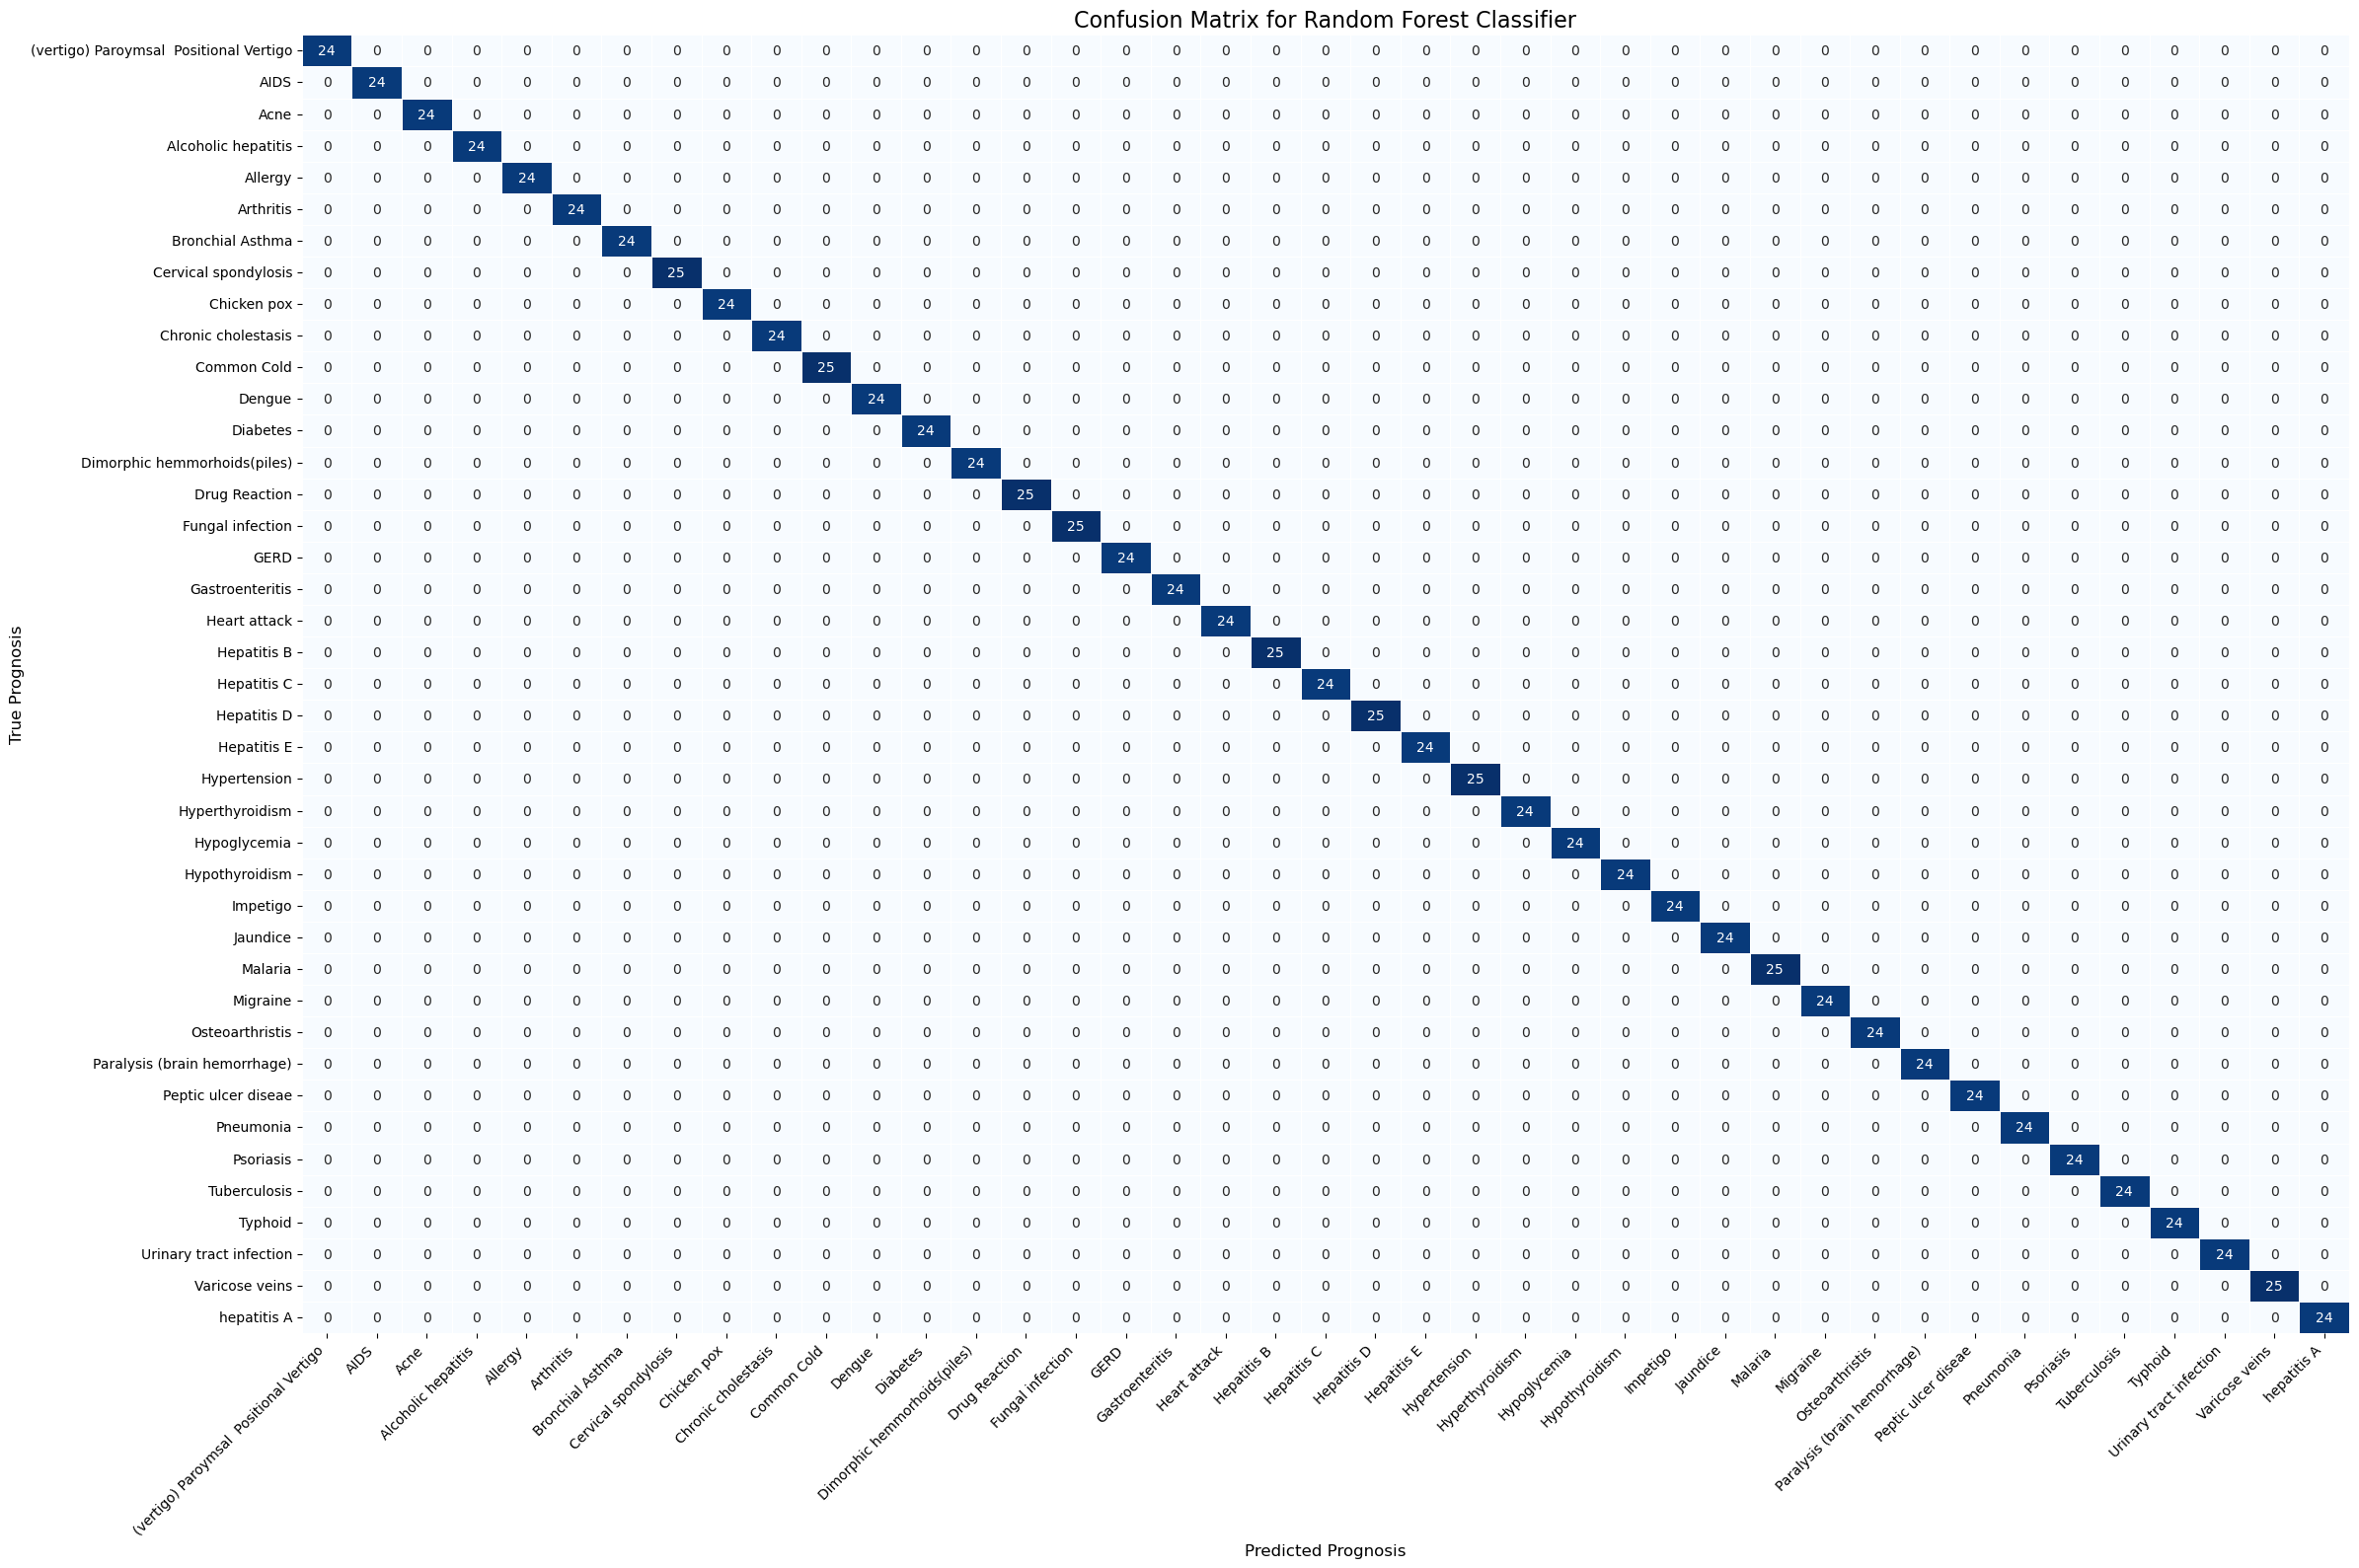

In [34]:
# Visualize Confusion Matrix

plt.figure(figsize=(24, 16))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=.5)
plt.title('Confusion Matrix for Random Forest Classifier', fontsize=16)
plt.xlabel('Predicted Prognosis', fontsize=12)
plt.ylabel('True Prognosis', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [35]:
# Visualize Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(class_report)


Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        25
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.00      1.00      1.00        25
   